# Regression Analysis

Regression analysis is a statistical technique that allows us to determine the relationship between two or more quantitative variables in order to predict a response or outcome variable from one or more of them. This methodology is frequently employed in a variety of fields, including business, social and behavioral sciences, biology, and many more. 

Here are a few examples of applications:

1. In  business, the relationship between product sales and advertising expenditures can be used to forecast product sales.

2. A financial firm may wish to know the top five causes that drive a customer to default in order to reduce risk in their portfolio.

3. A automobile insurance firm might use expected claims to Insured Declared Value ratio to create a suggested premium table using linear regression. The risk might be calculated based on the car's characteristics, the driver's information, or demographics.

The goal of regression is to create a model that expresses the relationship between a response ${\displaystyle Y_{i}} \in  R^n$ and a set of one or more (independent) variables ${\displaystyle X_{i}} \in  R^n$. We can use the model to predict the response ${\displaystyle Y_{i}}$ based on the factors (or variables).

The following elements are included in regression models:

* The unknown parameters, which are frequently denoted as a scalar or vector $\beta$.

* The independent variables, which are observed in data and are frequently expressed as a vector  ${\displaystyle X_{i}}$ (where  ${\displaystyle i}$ denotes a data row).

* The dependent variable, which can be seen in data and is frequently represented by the scalar $Y_{i}$.

* The error terms, which are not readily visible in data and are frequently represented by the scalar $e_{i}$.

Most regression models propose that $Y_{i}$ is a function of $X_{i}$ and $\beta$, 

$${\displaystyle Y_{i}=f(X_{i},\beta )+e_{i}}.$$

In other words, regression analysis aims to find the function $f(X_{i},\beta)$ that best matches the data. The function's form must be supplied in order to do regression analysis. The form of this function is sometimes based on knowledge of the relationship between $X_{i}$ and $Y_{i}$. If such information is not available, a flexible or convenient form is adopted.

## Simple linear regression

The simplest model to consider is a linear model, in which the response ${\displaystyle Y_{i}}$ is linearly proportional to the variables ${\displaystyle X_{i}}$:

$${\displaystyle Y_{i}=\beta _{0}+\beta _{1}X_{i}+e_{i}}$$

## Insurance Premium Prediction: Example

For analysis, we used the Kaggle public dataset "Insurance Premium Prediction.". There are 1338 samples and 7 features.

We will learn how to predict insurance costs based on the features age, sex, bmi, children, smoking status, and region.

Let us start by loading the data and performing a preliminary analysis with df.info ()

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

from scipy.stats import *

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math as m
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from scipy.stats import pearsonr,spearmanr

ModuleNotFoundError: No module named 'statsmodels'

In [88]:
df = pd.read_csv('/Users/Kaemyuijang/SCMA248/Data/insuranceKaggle.csv')

Exploration of the dataset is always a good practice.

We will use charges as the dependent variable and the other variables as independent variables, which means we will have to predict charges based on the independent variables.

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In out data set, types of variables are as follows:

* categorical variables: sex, smoker, region

* numerical variables: age, bmi, children, expenses

There is no missing data among 1338 records.

#### Exploratory data analysis

It is now time to experiment with the data and make some visualizations.

In our dataset, a **pairplot** plots pairwise relationships. The pairplot function creates a grid of Axes in which each variable in the data is shared across a single row and a single column on the y-axis.

A pairs plot shows the distribution of single variables as well as the relationships between them. Pair plots are a great way to detect trends for further study, and they're simple to create in Python!

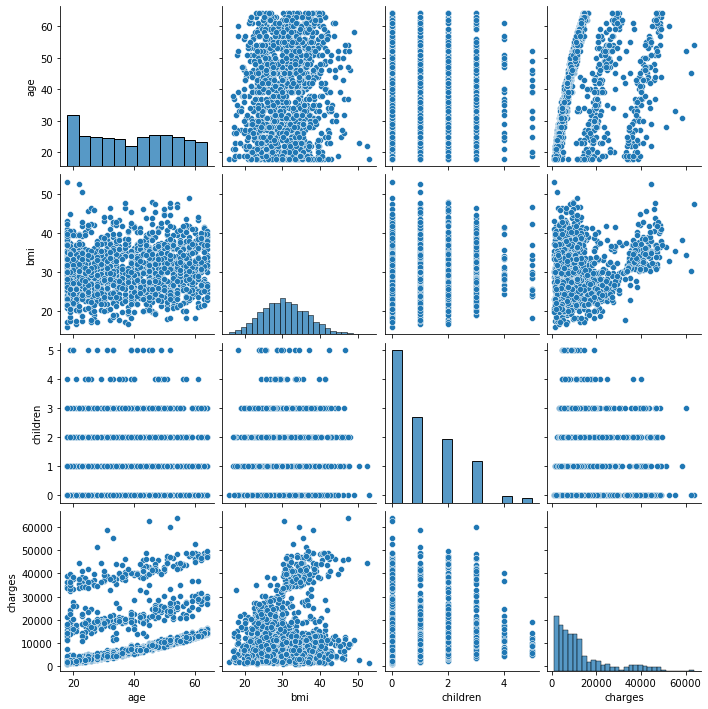

In [90]:
sns.pairplot(df)

**Note:** We can see that age is correlated with the response variable charges.

#### Make a research question

For our first regression analysis, we are interested in the following question.

> Is there an association between charges and age?

The normal error regression model will be used to determine the linear relationship:
$${\displaystyle Y_{i}=\beta _{0}+\beta _{1}X_{i}+e_{i}}$$
    

We need to define a null hypothesis and an alternative hypothesis before we can run the numbers:

H0 (null hypothesis): There is no linear relationship between charge and age;

H1 (Alternative hypothesis): There is a linear relationship between charge and age.

If this hypothesis is accepted, one should discard the $X$ information and base inferences on the $Y$ values alone (so $Y_i = \bar{Y}$).


#### Running and reading a simple linear regression

**statsmodels** is a Python package that may be used to fit a variety of statistical models, run statistical tests, and explore and visualize data. Other libraries contain Bayesian methods and machine learning models, whereas Statsmodels contains more "traditional" frequentist statistical approaches.

In statsmodels, there are various types of linear regression models, ranging from the most basic (e.g., ordinary least squares) to the most complicated (e.g., logistic regression) (e.g., iteratively reweighted least squares).

In what follows, we will use Python's statsmodels module to implement **Ordinary Least Squares(OLS) method** of linear regression.

#### Method of least squares

The general model takes the following form: 

$${\displaystyle Y_{i}=f(X_{i},\beta )+e_{i}}.$$

Given a data set consists of $n$ points (data pairs) ${\displaystyle (x_{i},y_{i})\!}, i = 1,\ldots, n,$ where ${\displaystyle x_{i}\!}$ is an independent variable and ${\displaystyle y_{i}\!}$ is a dependent variable, 
we define
the **residual** as the difference between the observed value of the dependent variable and the value predicted by the model. It is used to assess a model's fit to a data point:

$${\displaystyle r_{i}=y_{i}-f(x_{i},\beta ).}$$

The least-squares method finds the optimal parameter values $\beta$ by minimizing the sum of squared residuals, ${\displaystyle S}$

$${\displaystyle S=\sum _{i=1}^{n}r_{i}^{2}.}$$


#### Linear least squares

For the simplest linear model $${\displaystyle Y_{i}=\beta _{0}+\beta _{1}X_{i}+e_{i}},$$ the method of least squares reduces to find the vaues of $\beta _{0}$ and $\beta _{1}$ that minimise
$${\displaystyle S=\sum _{i=1}^{n}(y_{i}- \beta _{0}-\beta _{1}x_{i}  )^{2}.}$$


Follow the link for more details: https://en.wikipedia.org/wiki/Linear_least_squares#Example

Here is the diagram to illustrate the idea of method of least squares. 
![Data science life cycle: from Berkley](https://thermanuals.files.wordpress.com/2014/12/linegraph.jpg)


The main interfaces for linear models in statsmodels are array-based and formula-based. These can be accessible via the following API module imports:

In [91]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [92]:
model1 = smf.ols(formula='charges ~ age', data=df).fit()

* smf calls the package Statsmodel

* ols command indicates that we're employing an Ordinary Least Square (OLS) regression (a type linear regression)

* formula= is a formula that is used to write the dependent as well as all of the independent variables (s)

* dependent variable/outcome: first variable within the parenthesis before "~": Our only dependent variable is the first one. This is our result, the variable that defines the type of regression to use and the one that will be linked to all other covariates.

* ~ inside parenthesis: Creates a division between the outcome (dependent variable) on the left and the covariates (independent variables) on the right.

* independent covariates/independent variables: All other variables after the "," inside parenthesis, are independent covariates/independent variables.

* The + symbol is used to differentiate various independent variables within the same model (helpful for multivariable models, aka many variables).

* ,data= is used to specify the data frame's name.

* fit() tell Python that we want to fit our function ("run the function").

#### Interpreting the results

To view the results of the model, you can use `summary()` function:

In [93]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Sat, 09 Jul 2022   Prob (F-statistic):           4.89e-29
Time:                        17:35:38   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see some important general data about the model on the upper half of the output.

On the left, we can observe

* The dependent variable is charges.

* We are running an ordinary least square (OLS) regression model.

* We included 1338 observations (patients).

We can notice some key information about the model diagnosis in the right column:

* **Determination coefficient** (R-squared) tells us the fraction (%) of variation in the response variable Y that can be explained by the predictor variable X. Its value goes from 0 (no predictability) to 1 (100 percent), indicating total predictability. A high R-squared means that the response variable may be predicted with less error.

See the following link for more details: 
https://vitalflux.com/linear-regression-explained-python-sklearn-examples/

In our example, R-squared = 0.089, indicating that the model explains 9 percent of the outcome variability. 

**Note** also that the low R-squared graph shows that even noisy, high-variability data may have a significant trend. The trend indicates that the predictor variable still provides information about the response even though data points fall further from the regression line.

* **The F-statistic value** is the outcome of a test in which the null hypothesis is that all regression coefficients are equal to zero. To put it another way, the model has no predictive capability.  

Essentially, the F-test compares your model against a model with no predictor variables (the intercept alone model) to see if adding coefficients improved the model. If you get a significant result, it means that the coefficients you added to your model improved its fit.

For example, consider a multiple linear regression model:

$${\displaystyle Y=\beta _{0}+\beta _{1}X_{1}+\beta _{2}X_{2}+\beta _{3}X_{3}+\beta _{4}X_{4}+e_{i}},$$

The F-statistic allows us to examine whether ANY of the independent variables $X_1, X_2, X_3, X_4$, etc. are connected to the result $Y$.

For a 0.05 significance level:

* If the p-value associated with the F-statistic is less than 0.05, there is no relationship between any of the independent variables and Y.

* If the p-value associated with the F-statistic is less than 0.05, AT LEAST 1 independent variable is related to Y.


In this example, the Prob (F-statistic), which here is <0.05, indicates that our linear regression model provides a better fit to the data than a model that contains no independent variables.

Regarding the output on the bottom half, we will read the output one column at a time. We are looking at the association between our charges and our independent variable, age (first column), 

*  **Age coefficient** represents the change in the output Y (charges) due to a change of one unit in age. The age coefficient in this case is  257.7226.

* **std err** reflects the level of accuracy of the coefficients. The lower the standard error is, the higher is the level of accuracy.  The results shows the standard error of the coefficient of 22.502. 

* P >|t| is our p-value with a t-ratio (for a t-distribution) of 11.453 (fourth column). A **p-value** of less than 0.05 is considered to be statistically significant.

* **Confidence Interval** represents the range in which the (age) coefficient is likely to fall, i.e. corresponding to a 95% confidence interval for the age coefficient between 213.579 and 301.866.

For the Intercept, this is the y-intercept of the regression equation, with a value of 3165.8850. You can plug this into your regression equation if you want to predict charges across the range of age that you have observed:



**Note:** we will not partition our data into training and testing because we are conducting an observational study to observe/test an association rather than constructing a predictive model. As a result, do not be surprised if this method differs from what you'll find in most data science classes.

#### Presenting the results

From our analysis, we found that the regression coefficients are 
$$\beta_0 = 3165.885006 \text{ and } \beta_1 = 257.722619.$$

The estimated regression function is 
$$ \hat{Y} = 3165.885 + 257.7226X. $$

When reporting your results, include the estimated effect (i.e. the regression coefficient), standard error of the estimate, and the p-value, we should additionally explain what your regression coefficient means to your viewers by interpreting your your regression coefficient means:

Age and charges have a significant relationship (p < 0.001), with a 257.7226-unit (95% CI of $\beta_1$: 257.7226 $\pm$ 22.502) increase in charges for each increase in age.

It is also a good idea to provide a graph with your findings. You can plot the observations on the x and y axes and then add the regression line and regression function for a simple linear regression (show below):


In [94]:
# Model parameters

print('Estimates of model parameters:\n',model1.params, '\n')

print('t values:\n', model1.tvalues)

Estimates of model parameters:
 Intercept    3165.885006
age           257.722619
dtype: float64 

t values:
 Intercept     3.378207
age          11.453122
dtype: float64


#### Predicted values and residuals

We can compute predicted values given the estimated model parameters using `predict` function. 

In what follows, we calculate the predicted values and use them to calculate the residuals.

Recall that the $i$th residual is the difference between the observed value $Y_i$ and the corresponding fitted value $\hat{Y_i}$.

In [95]:
x=df[['age']]
y=df[['charges']]

predictions = model1.predict(x)
df['slr_result'] = predictions

df['slr_error'] =  df['charges'] - df['slr_result']

In [96]:
df[['age','charges','slr_result','slr_error']]

age      charges    slr_result     slr_error
0      19  16884.92400   8062.614761   8822.309239
1      18   1725.55230   7804.892142  -6079.339842
2      28   4449.46200  10382.118329  -5932.656329
3      33  21984.47061  11670.731422  10313.739188
4      32   3866.85520  11413.008803  -7546.153603
...   ...          ...           ...           ...
1333   50  10600.54830  16052.015939  -5451.467639
1334   18   2205.98080   7804.892142  -5598.911342
1335   18   1629.83350   7804.892142  -6175.058642
1336   21   2007.94500   8578.059998  -6570.114998
1337   61  29141.36030  18886.964745  10254.395555

[1338 rows x 4 columns]

/Users/Kaemyuijang/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
/Users/Kaemyuijang/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


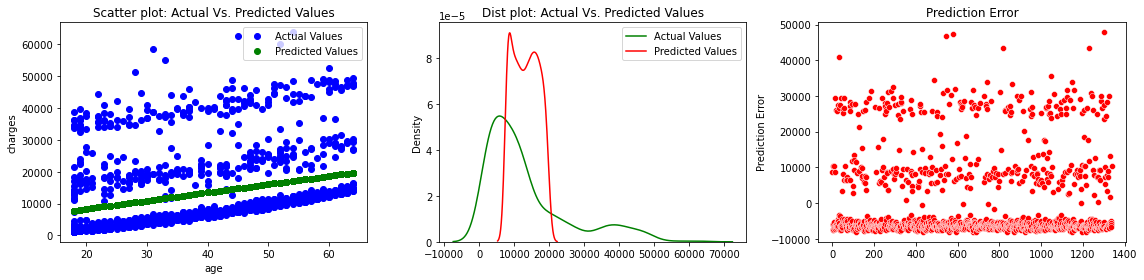

In [97]:
fig, axes =plt.subplots(1,3, figsize=(16,4))
axes[0].plot(x['age'], y,'bo',label='Actual Values')
axes[0].plot(x['age'], predictions,'go',label='Predicted Values')
axes[0].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0].set_xlabel("age")
axes[0].set_ylabel("charges")
axes[0].legend()

sns.distplot(y, hist=False, color="g", label="Actual Values",ax=axes[1])
sns.distplot(predictions, hist=False, color="r", label="Predicted Values" , ax=axes[1])
axes[1].set_title("Dist plot: Actual Vs. Predicted Values")
axes[1].legend()

sns.scatterplot(x=y.index,y='slr_error',data=df,color="r", ax=axes[2])
axes[2].set_title("Prediction Error")
axes[2].set_ylabel("Prediction Error")

fig.tight_layout()

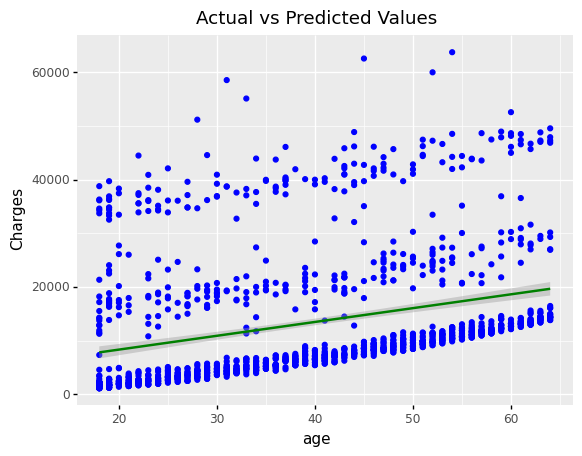

<ggplot: (300420313)>

In [98]:
import pandas as pd
import numpy as np

from plotnine import *
from plotnine.data import *

%matplotlib inline

(
    ggplot(df, aes(x='age', y='charges'))
    + geom_point(color='blue')
    + geom_smooth(method='lm',color='green')
    + labs(y='Charges', title = 'Actual vs Predicted Values')
    + scale_fill_manual(
    values = ['Actual values','Predicted values'],
    name = " ", labels = ['Actualvalues','Predicted values'] )
)

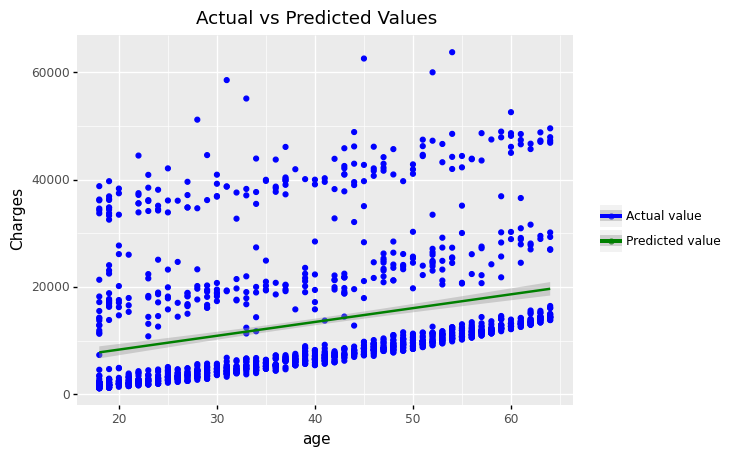

<ggplot: (305221401)>

In [99]:
(
    ggplot(df,aes(x='age',y='charges', color='"Actual value"'))
    + geom_point()
    + geom_smooth(mapping = aes(color='"Predicted value"'), method='lm')
    + labs(y='Charges', title = 'Actual vs Predicted Values')
    #+ scale_fill_manual(
    #values = ['Actual values','Predicted values'],
    #name = " ", labels = ['Actual values','Predicted values'] )
    + scale_color_manual(values = ["blue", "green"], # Colors
        name = " ") # Remove the legend title
    
)

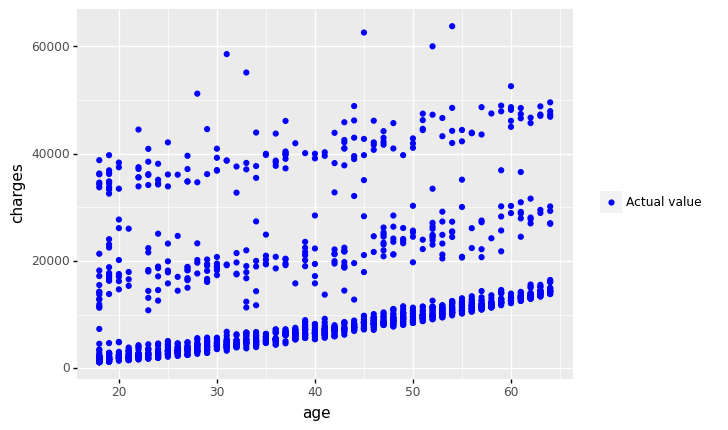

<ggplot: (300775873)>

In [100]:
(
    ggplot(df)
    + geom_point(aes(x = 'age', y='charges',color='"Actual value"')) 
    + scale_color_manual(values = ["blue"], # Colors
        name = " ")
)

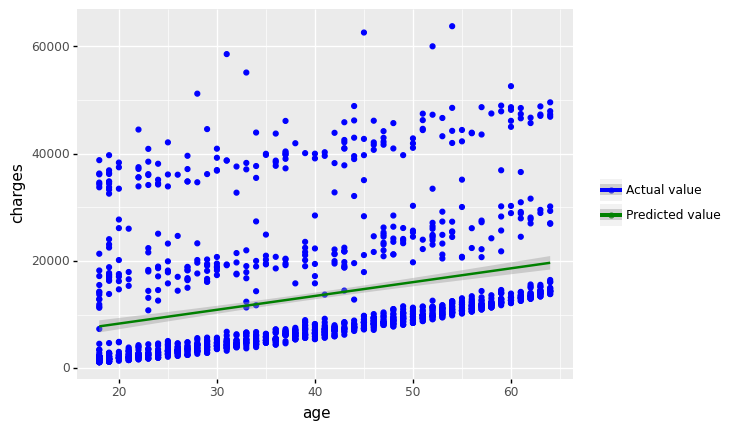

<ggplot: (300807313)>

In [101]:

(
    ggplot(df)
    + geom_point(aes(x = 'age', y='charges',color='"Actual value"')) 
    + geom_smooth(aes(x='age',y='charges',color='"Predicted value"'), method='lm')
    + scale_color_manual(values = ['blue','green'], # Colors
        name = " ")
)

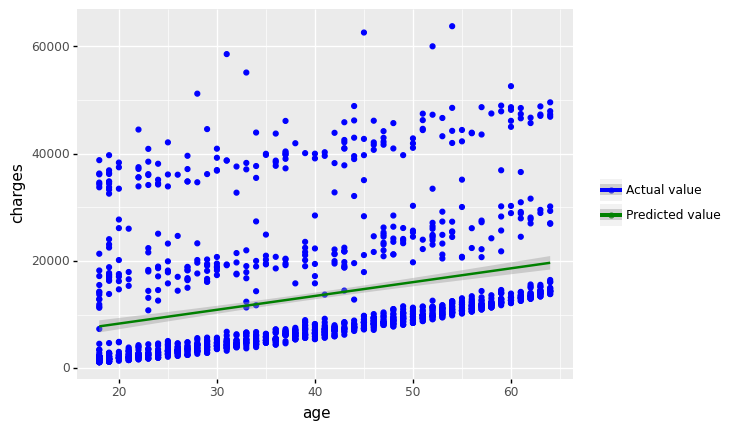

<ggplot: (304867401)>

In [102]:
(
    ggplot(df) + aes(x = 'age', y='charges')
    + geom_point(aes(color='"Actual value"')) 
    + geom_smooth(aes(color='"Predicted value"'), method='lm')
    + scale_color_manual(values = ['blue','green'], # Colors
        name = " ")
)

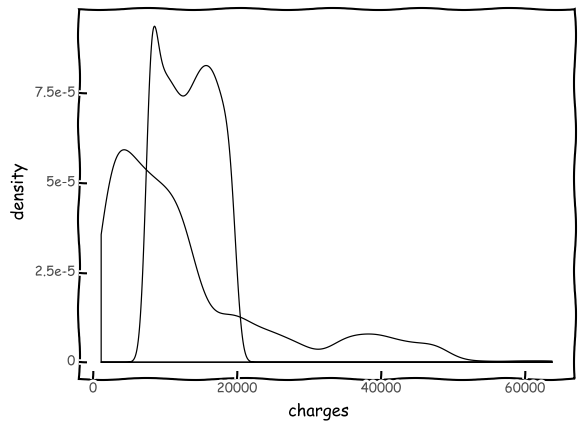

<ggplot: (306741109)>

In [103]:
(
    ggplot(df, aes(x='charges'))
    +  geom_density(aes(y=after_stat('density')))
    +  geom_density(aes(x='slr_result',y=after_stat('density')))
    + theme_xkcd()
)

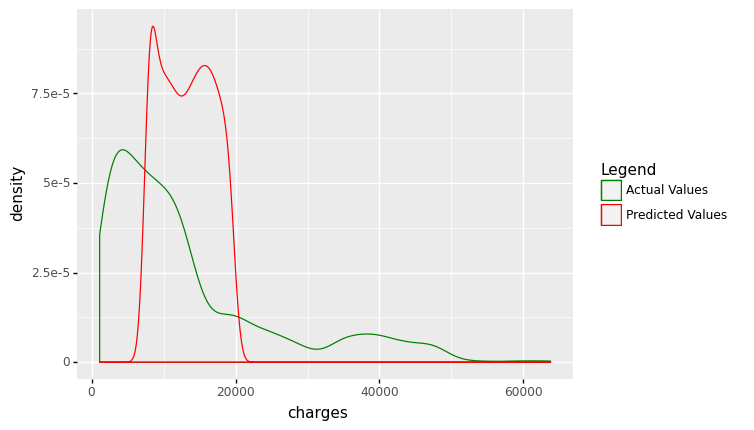

<ggplot: (306278033)>

In [104]:
(
    ggplot(df, aes(x='charges'))
    +  geom_density(aes(y=after_stat('density'),color='"Actual Values"' ))
    +  geom_density(aes(x='slr_result',y=after_stat('density'),color='"Predicted Values"')) 
    +  scale_color_manual(values = ['green','red'], name = 'Legend') 
)

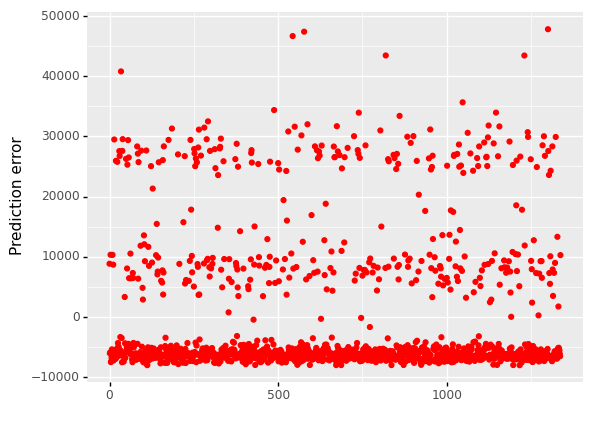

<ggplot: (305154745)>

In [105]:
(
    ggplot(df, aes(x='df.index'))
    +  geom_point(aes(y='slr_error'),color='red')
    + labs(x = ' ', y='Prediction error')
)

**Exercise** In this exercise, we will use the gapminder dataset. Our aim is to determine a relationship between life expectancy and year?

1. Plot life expectancy over time in a scatter plot.

2. Is there a general trend in life expectancy over time (e.g., increasing or decreasing)? Is this a linear trend? 

3. How would you characterize the distribution of life expectancy for individual years among countries? Is the data skewed or not? Is it better to be unimodal or multimodal? Is it symmetrical around the center? 

4. Fit a linear regression model using statsmodels.

5. Will you reject the null hypothesis of no association if I run a linear regression model of life expectancy vs. year (considering it as a continuous variable) and test for a relationship between year and life expectancy?

In [106]:
gapminder = pd.read_csv('/Users/Kaemyuijang/SCMA248/Data/gapminder_full.csv')

In [107]:
gapminder.head()

country  year  population continent  life_exp     gdp_cap
0  Afghanistan  1952     8425333      Asia    28.801  779.445314
1  Afghanistan  1957     9240934      Asia    30.332  820.853030
2  Afghanistan  1962    10267083      Asia    31.997  853.100710
3  Afghanistan  1967    11537966      Asia    34.020  836.197138
4  Afghanistan  1972    13079460      Asia    36.088  739.981106

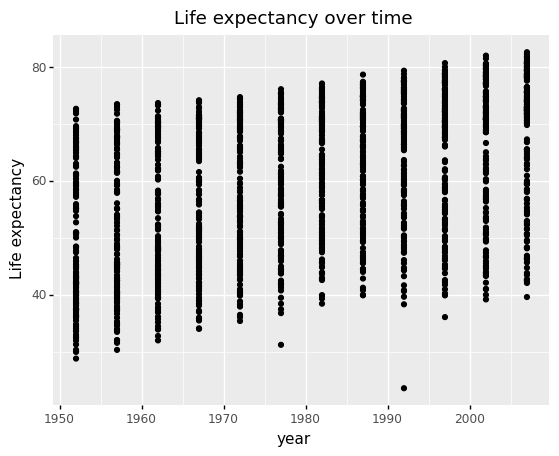

<ggplot: (304622001)>

In [108]:
(
    ggplot(gapminder) + 
    aes(x= 'year',y = 'life_exp') +
    geom_point()  +
    labs(x = 'year', y='Life expectancy', title = 'Life expectancy over time')
)

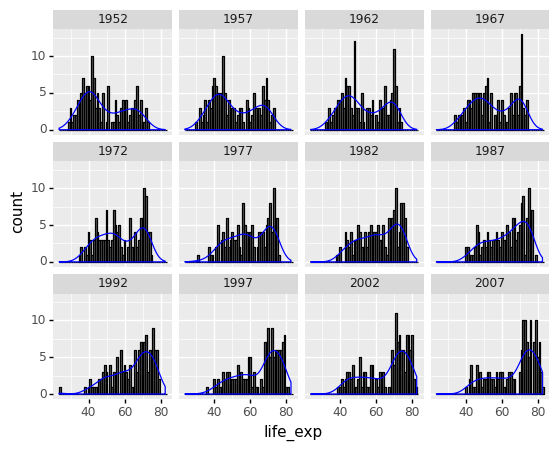

<ggplot: (309754613)>

In [109]:
(
    ggplot(gapminder) + 
    aes('life_exp') +
    geom_histogram(aes(y=after_stat('count')), binwidth = 1, color = 'black') +
    geom_density(aes(y=after_stat('count')),color='blue') +
    facet_wrap('year')
)

#### Violin plots

A **violin plot** displays the densities of different groups, allowing you to compare their distributions.

Violin plots are similar to box plots in that they display the probability density of the data at various values, which is normally smoothed using a kernel density estimator. Typically, a violin plot will include all of the data found in a box plot: a marker for the data's median; a box or marker representing the interquartile range; and, assuming the number of samples is not too large, all sample points.

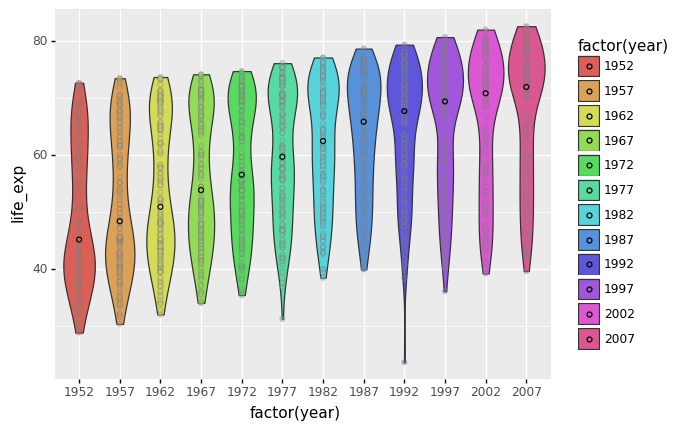

<ggplot: (311171093)>

In [110]:
# useful link: https://r-charts.com/distribution/violin-plot-mean-ggplot2/

(
    ggplot(gapminder) + 
    aes(x= 'factor(year)',y = 'life_exp', fill = 'factor(year)') + 
    geom_violin() +
    geom_point(color='gray',alpha=0.4) + 
    stat_summary(fun_y=np.median,
               geom = 'point',
               color = 'black')
)



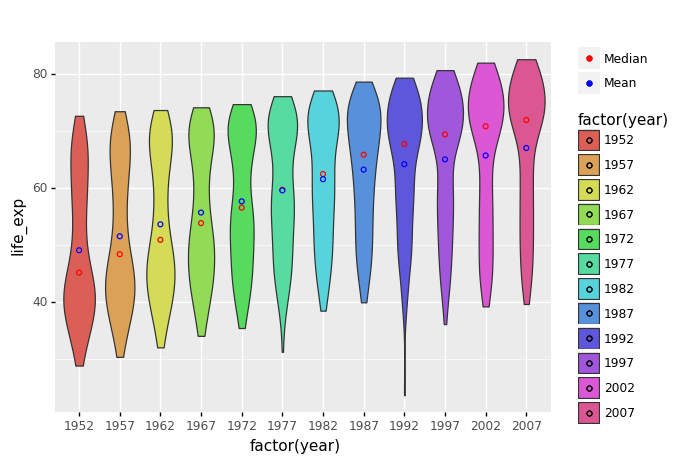

<ggplot: (300058737)>

In [111]:
(
    ggplot(gapminder) + 
    aes(x= 'factor(year)',y = 'life_exp', fill = 'factor(year)') + 
    geom_violin() +
    stat_summary(mapping=aes(color='"Median"'),
                 fun_y=np.median,
                 geom = 'point') +
    stat_summary(mapping=aes(color='"Mean"'),
                 fun_y=np.mean,
                 geom = 'point') +
    scale_color_manual(values = ["red", "blue"], # Colors
                name = " ") # Remove the legend title
)


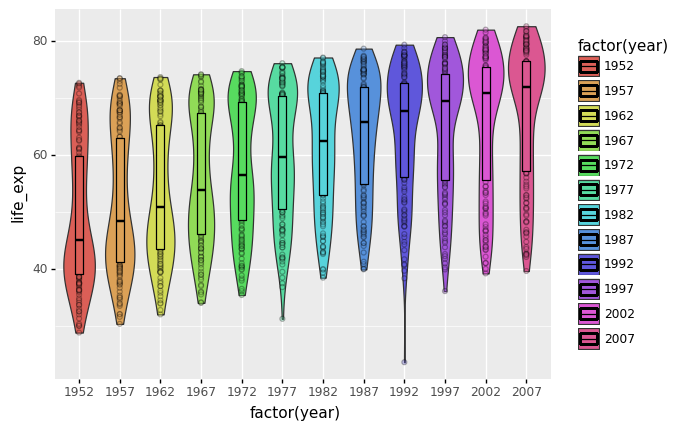

<ggplot: (306789701)>

In [112]:
(
    ggplot(gapminder) + 
    aes(x= 'factor(year)',y = 'life_exp', fill = 'factor(year)') + 
    geom_violin() +
    geom_point(alpha=0.3) + 
    stat_summary(fun_y=np.median,
                 fun_ymin=lambda x:  np.percentile(x,25),
                 fun_ymax=lambda x:  np.percentile(x,75),
               geom = 'crossbar',  # try pointrange
               color = 'black', width = 0.2)
)


In [113]:
model2 = smf.ols(formula='life_exp ~ year', data=gapminder).fit()

In [114]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               life_exp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Sat, 09 Jul 2022   Prob (F-statistic):           7.55e-80
Time:                        17:36:01   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.000    -649.031    -522.273
year           0.3259      0.016     19.965      0.000       0.294       0.358
==============================================================================
Omnibus:                      386.124   Durbin-Watson:                   0.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.750
Skew:                          -0.268   Prob(JB):                     1.97e-20
Kurtosis:                       2.004   Cond. No.                     2.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Exercise**

1. Write Python code to create a random dataset and perform a linear regression analysis on this dataset with `sd_error = 1`, the standard deviation of the error term.

2. Repeat the problem with `sd_error = 1`.

3. Compare the results between these two samples. 

In [115]:
np.random.seed(888)

# number of sample
nsample = 50

# model parameter values
a = 2
b = 5

sd_error = 1

xsample = np.random.rand(nsample)
ysample = a + b*xsample + norm.rvs(size=nsample, loc = 0, scale=sd_error, )

random_data = pd.DataFrame({'x':xsample,'y':ysample})

random_data.head()

x         y
0  0.859561  5.959411
1  0.164569  2.820203
2  0.483476  5.866683
3  0.921027  7.971193
4  0.428556  6.834657

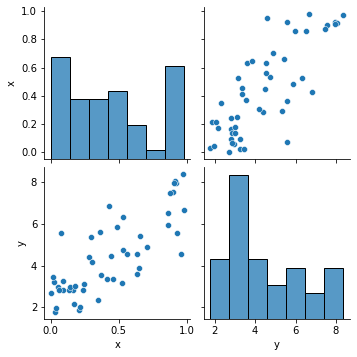

In [116]:
sns.pairplot(random_data)

In [117]:
results = smf.ols('ysample ~ xsample', data = random_data).fit()

In [118]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ysample   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     81.41
Date:                Sat, 09 Jul 2022   Prob (F-statistic):           6.57e-12
Time:                        17:36:03   Log-Likelihood:                -76.771
No. Observations:                  50   AIC:                             157.5
Df Residuals:                      48   BIC:                             161.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3954      0.277      8.635      0.000       1.838       2.953
xsample        4.6387      0.514      9.023      0.000       3.605       5.672
==============================================================================
Omnibus:                        1.034   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                1.081
Skew:                           0.304   Prob(JB):                        0.582
Kurtosis:                       2.613   Cond. No.                         3.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A 2 by 2 figure based on `xsample` showing fitted versus actual `ysample`, residuals versus the `xsample`, partial regression plot of `xsample`, and CCPR Alot for `xsample`.

eval_env: 1


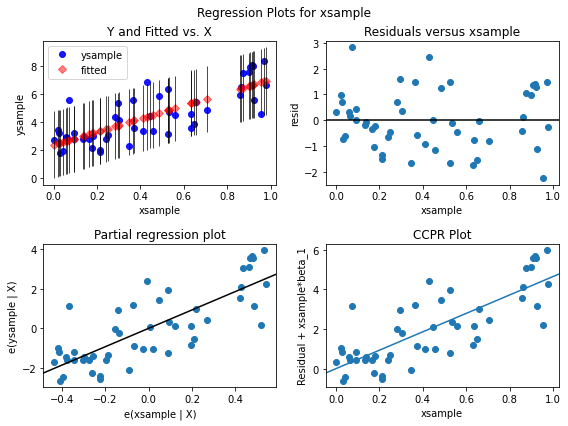

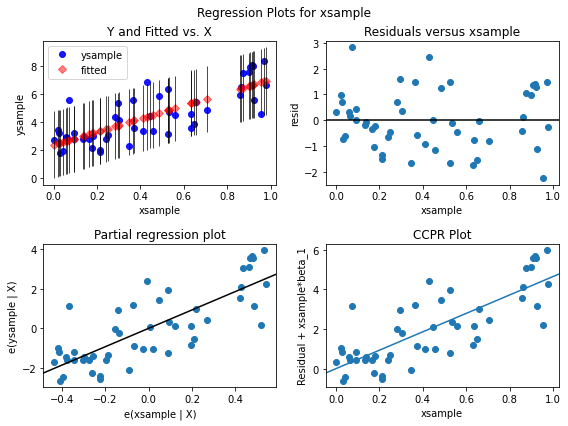

In [119]:
fig = plt.figure(figsize=(8, 6))
sm.graphics.plot_regress_exog(results, 'xsample', fig=fig)

## Multivariate Analysis

Our next analysis is to estimate the association between two or more independent variables and one dependent variable. Multiple linear regression will be used to answer the following:

1. The degree to which two or more independent variables and one dependent variable are related (e.g. how strong the relationship is between independent variables (age, bmi, and smoker) and dependent variable (charges)).

2. The value of the dependent variable at a given value of the independent variables (e.g. age, bmi, and smoking status addition)

In [120]:
df = pd.read_csv('/Users/Kaemyuijang/SCMA248/Data/insuranceKaggle.csv')

In [121]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

### Exploratory Data Analysis (EDA)

We will perform exploratory data analysis to analyze data quality as well as uncover hidden relationships between variables. In this exercise, I'll go through three strategies relevant to regression analysis:

1. Multivariate analysis
2. Preprocessing categorical variables
3. Correlation Analysis

#### Multivariate analysis

We have already created a pairs plot to shows the distribution of single variables as well as the relationships between them. 

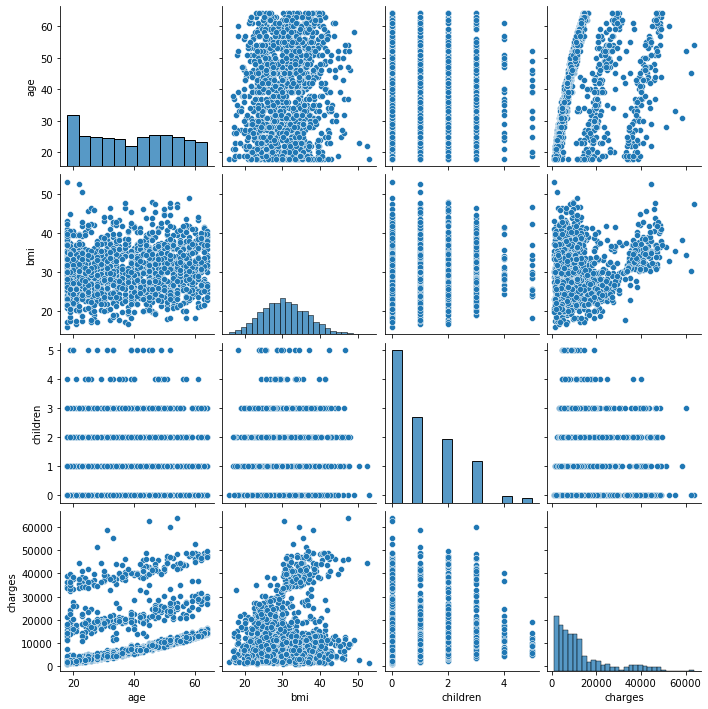

In [122]:
sns.pairplot(df)

**Note** Our dataset contains both continuous and categorical variables. However, the pairs plot shows only the relationship of the continuous variables.

In Seaborn, pairs plots (scatter plots or box plots) can take an additional hue argument to add another variable for comparison (e.g., for comparison between different categories).

#### Pairs Plot with Color by Category

Consider making the categorical variable the legend. To do this, we first create the lists of numeric variables **num_list** and categorical variables **cat_list**.

In [123]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [124]:
# Asserting column(s) data type in Pandas
# https://stackoverflow.com/questions/28596493/asserting-columns-data-type-in-pandas

import pandas.api.types as ptypes


num_list = []
cat_list = []

for column in df.columns:
    #print(column)
    if ptypes.is_numeric_dtype(df[column]):
        num_list.append(column)
    elif ptypes.is_string_dtype(df[column]):
        cat_list.append(column)     

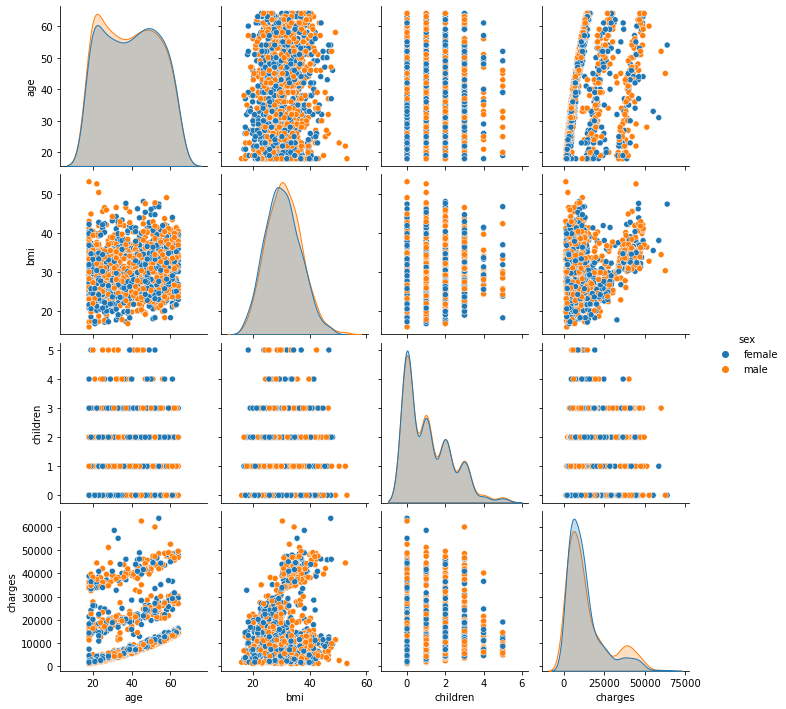

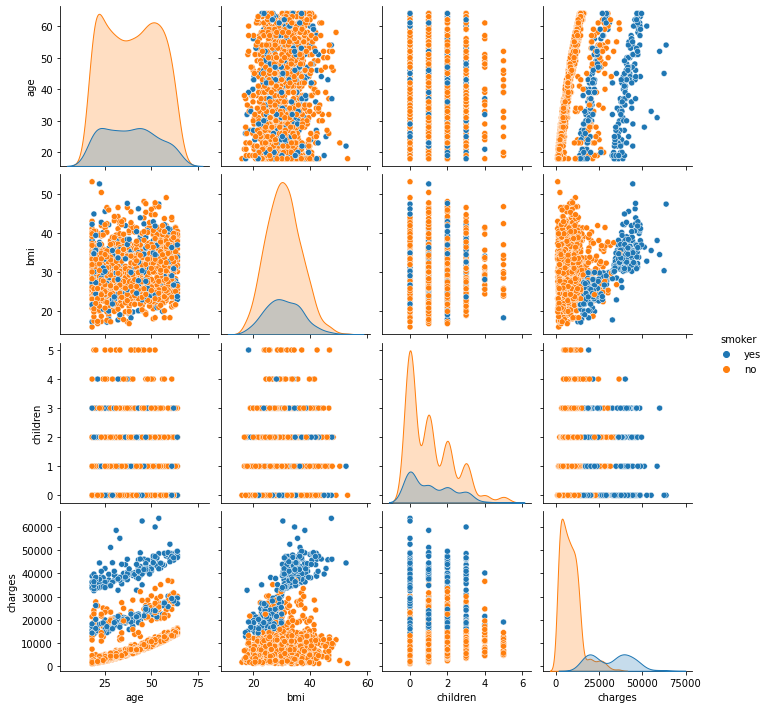

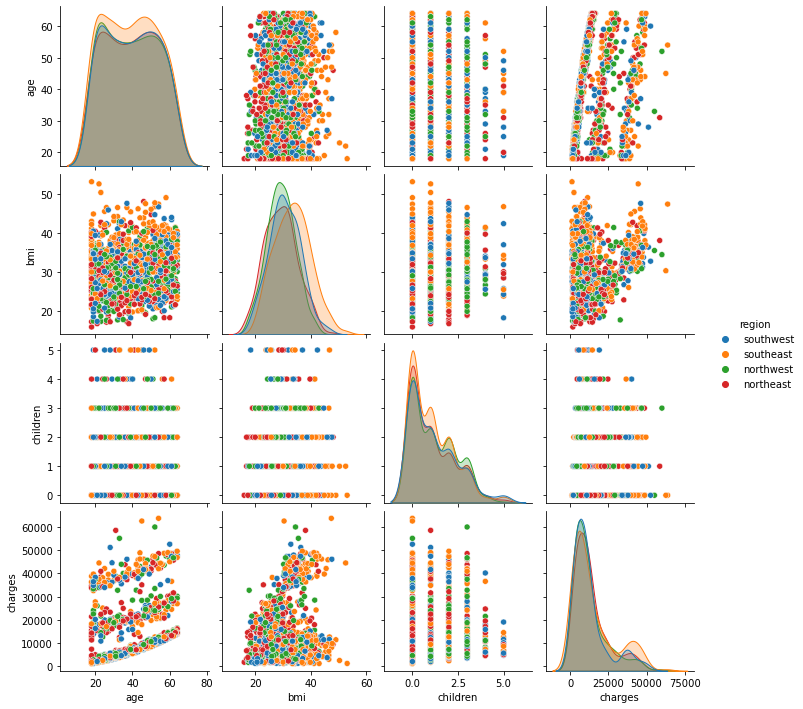

In [125]:
# pairplot with hue

for i in range(0,len(cat_list)):
    hue_cat = cat_list[i]
    sns.pairplot(df, hue = hue_cat)
    

In [126]:
# df.head()

<AxesSubplot:xlabel='age', ylabel='charges'>

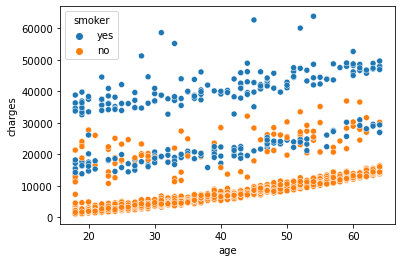

In [127]:
sns.scatterplot(x='age',y='charges', hue = 'smoker', data =df)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

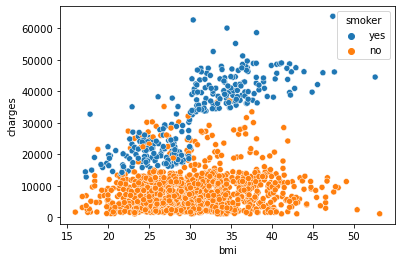

In [128]:
sns.scatterplot(x='bmi',y='charges', hue = 'smoker', data =df)

We can observe that age, bmi, and smoking status are all correlated to the target variable charges. Charges increase as you become older and your BMI rises. The Smoker variable clearly separates the data set into two groups. It suggests that the feature "smoker" could be a good predictor of charges.

**Conclusion:** age, bmi, and smoker are all key factors in determining charges. In the data set, sex and region do not exhibit any significant patterns.

**Exercise** Use plotnine to create the two scatter plots above. 

#### Preprocessing categorical variables

Categorical variables cannot be handled by most machine learning algorithms unless they are converted to numerical values. The categorical variables must be preprocessed before they may be used. We must transform these categorical variables to integers in order for the model to comprehend and extract useful information.

We can encode these categorical variables as integers in a variety of ways and use them in our regression analysis. We'll take a look at two of them, including

* One Hot Encoding

* Label Encoding

#### One Hot Encoding

In this method, we map each category to a vector that comprises 1 and 0, indicating whether the feature is present or not. The number of vectors is determined by the number of feature categories. If the number of categories for the feature is really large, this approach produces many columns, which considerably slows down the model processing. 

The **get_dummies** function in Pandas is quite simple to use. The following is a sample DataFrame code:

In [129]:
df_encoding1 = pd.get_dummies(df, columns = cat_list)

In [130]:
df_encoding1

age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400           1         0          0   
1      18  33.770         1   1725.55230           0         1          1   
2      28  33.000         3   4449.46200           0         1          1   
3      33  22.705         0  21984.47061           0         1          1   
4      32  28.880         0   3866.85520           0         1          1   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830           0         1          1   
1334   18  31.920         0   2205.98080           1         0          1   
1335   18  36.850         0   1629.83350           1         0          1   
1336   21  25.800         0   2007.94500           1         0          1   
1337   61  29.070         0  29141.36030           1         0          0   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0              1                 0                 0                 0   
1              0                 0                 0                 1   
2              0                 0                 0                 1   
3              0                 0                 1                 0   
4              0                 0                 1                 0   
...          ...               ...               ...               ...   
1333           0                 0                 1                 0   
1334           0                 1                 0                 0   
1335           0                 0                 0                 1   
1336           0                 0                 0                 0   
1337           1                 0                 1                 0   

      region_southwest  
0                    1  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
1333                 0  
1334                 0  
1335                 0  
1336                 1  
1337                 0  

[1338 rows x 12 columns]

Alternative to the above command, we also add two arguments 

* `drop_first=True` to get k-1 dummies out of k categorical levels by removing the first level,  

*`columns=['smoker','sex']` to specify the column names in the DataFrame to be encoded.


In [131]:
# Alternative to the above command, we also specify drop_first=True

df_encoding1 = pd.get_dummies(data=df, columns=['smoker','sex'], drop_first=True)

In [132]:
# print(df.head())
# df_encoding1.head()

# rename the column names
df_encoding1 = df_encoding1.rename(columns={"smoker_1":"smoker_yes","sex_1":"sex_male"})

df_encoding1

age     bmi  children     region      charges  smoker_yes  sex_male
0      19  27.900         0  southwest  16884.92400           1         0
1      18  33.770         1  southeast   1725.55230           0         1
2      28  33.000         3  southeast   4449.46200           0         1
3      33  22.705         0  northwest  21984.47061           0         1
4      32  28.880         0  northwest   3866.85520           0         1
...   ...     ...       ...        ...          ...         ...       ...
1333   50  30.970         3  northwest  10600.54830           0         1
1334   18  31.920         0  northeast   2205.98080           0         0
1335   18  36.850         0  southeast   1629.83350           0         0
1336   21  25.800         0  southwest   2007.94500           0         0
1337   61  29.070         0  northwest  29141.36030           1         0

[1338 rows x 7 columns]

#### Label Encoding

In this encoding, each category in this encoding is given a number between 1 and N (where N is the number of categories for the feature). One fundamental problem with this technique is that there is no relationship or order between these classes, despite the fact that the algorithm may treat them as such. (region0 < region1 < region2 and 0 < 1 <  2) is an example of what it might look like. The data-frame has the following Scikit-learn code:

In [133]:
df = pd.read_csv('/Users/Kaemyuijang/SCMA248/Data/insuranceKaggle.csv')

In [134]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

df_encoding2 = df

for i in cat_list:
    df_encoding2[i] = LabelEncoder().fit_transform(df[i])

In [135]:
df_encoding2

age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]

#### Correlation Analysis

The linear correlation between variable pairs is investigated using correlation analysis. This may be accomplished by combining the `corr()` and `sns.heatmap()` functions.

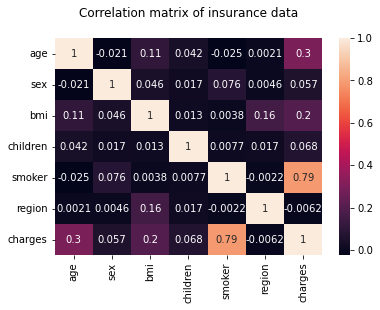

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

hm = sns.heatmap(df.corr(), annot = True)
hm.set(title = "Correlation matrix of insurance data\n")
plt.show()

**Note:** The correlation matrix also confirms that age, bmi, and smoker are all key factors in determining charges.

In what follows, we will use one hot encoding for the **smoker** category.

See https://python-graph-gallery.com/91-customize-seaborn-heatmap for customization of heatmap using seaborn.

In [137]:
#df = pd.read_csv('/Users/Kaemyuijang/SCMA248/Data/insuranceKaggle.csv')
#df = pd.get_dummies(df, columns = cat_list)

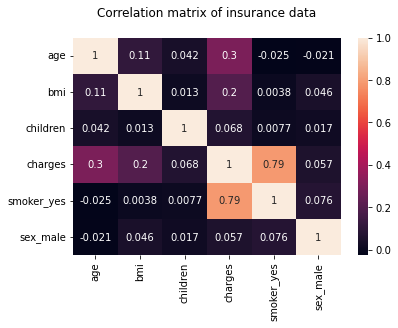

In [138]:
hm = sns.heatmap(df_encoding1.corr(), annot = True)
hm.set(title = "Correlation matrix of insurance data\n")
plt.show()

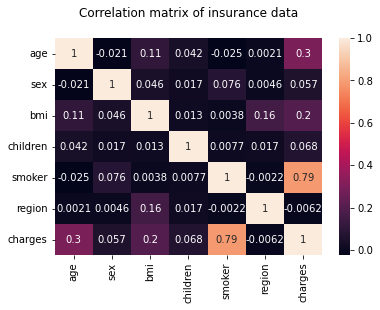

In [139]:
hm = sns.heatmap(df_encoding2.corr(), annot = True)
hm.set(title = "Correlation matrix of insurance data\n")
plt.show()

### Multiple Linear Regression

Multiple inputs and a single output are possible in multiple linear regression. We'll look at how numerous input variables interact to affect the output variable, as well as how the calculations differ from those of a simple linear regression model. We'll also use Python's **Statsmodel** to create a multiple regression model.

Recall that the fitted regression model equation is

$$ \hat{Y} = 3165.885 + 257.7226X. $$

**Multiple regression model**

$${\displaystyle Y =\beta _{0}+\beta _{1}X_{1}+\cdots +\beta _{p}X_{p}+\varepsilon}$$

Here, $Y$ is the output variable, and $X_1,\ldots,X_p$ terms are the corresponding input variables.

Hence, our Linear Regression model can now be expressed as:

$${\displaystyle charges =\beta _{0}+\beta _{1} age + \beta _{1} bmi  +\beta _{3} smoker\_yes+\varepsilon}$$

Finding the values of these constants (β) is the task of the regression model, minimizing the error function and fitting the best line or hyperplane (depending on the number of input variables).

This is done by minimizing the Residual Sum of Squares (RSS), which is obtained by squaring the differences between the actual and predicted results.

#### Building the model and interpreting the coefficients

Similar to linear regression analysis, the results can be obtained by running the following code:

**Fit and summary:**

In [140]:
df_encoding1

age     bmi  children     region      charges  smoker_yes  sex_male
0      19  27.900         0  southwest  16884.92400           1         0
1      18  33.770         1  southeast   1725.55230           0         1
2      28  33.000         3  southeast   4449.46200           0         1
3      33  22.705         0  northwest  21984.47061           0         1
4      32  28.880         0  northwest   3866.85520           0         1
...   ...     ...       ...        ...          ...         ...       ...
1333   50  30.970         3  northwest  10600.54830           0         1
1334   18  31.920         0  northeast   2205.98080           0         0
1335   18  36.850         0  southeast   1629.83350           0         0
1336   21  25.800         0  southwest   2007.94500           0         0
1337   61  29.070         0  northwest  29141.36030           1         0

[1338 rows x 7 columns]

In [141]:
model3 = smf.ols(formula='charges ~ age + bmi + smoker_yes', data=df_encoding1).fit()

In [142]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:36:44   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.168e+04    937.569    -12.454      0.000   -1.35e+04   -9837.561
age          259.5475     11.934     21.748      0.000     236.136     282.959
bmi          322.6151     27.487     11.737      0.000     268.692     376.538
smoker_yes  2.382e+04    412.867     57.703      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      299.709   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.137
Skew:                           1.213   Prob(JB):                    6.25e-155
Kurtosis:                       5.618   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Quantities of interest can be extracted directly from the fitted model. Type dir(results) for a full list. Here are some examples:

In [143]:
print("Parameters: ", model3.params)
print("R2: ", model3.rsquared)

Parameters:  Intercept    -11676.830425
age             259.547492
bmi             322.615133
smoker_yes    23823.684495
dtype: float64
R2:  0.7474771588119513


#### Fitted multiple regression function

Based on the previous results, the equation to predict the output variable using age, bmi, and smoker yes as input would be as follows:

$$ charges = - 11676.83042519 + (259.54749155 * age) + (322.61513282 * bmi) + (23823.68449531 * smoker\_yes) $$


#### Example of calculating fitted values

If sample data with actual output value 8240.5896 has 

* age = 46,
* bmi = 33.44 and
*smoker yes = 0, 

then we substitute the value of age for age, bmi and smoker_yes in the previous equation, we get

charges = 11050.6042276108 = - 11676.83042519 + (259.54749155*46) + (322.61513282*33.44) + (23823.68449531 * 0)  

If we construct a multiple linear regression model and use age, bmi, and smoker yes as input variables, a 46-year-old person will have to pay an insurance charge of 11050.6042276108.

We can see that the anticipated value is rather close to the real value. As a result, we can conclude that the Multiple Linear Regression model outperforms the Simple Linear Regression model.

**Note** Based on the linear regression result, equation to predict output variable **using only age as an input** would be like,

charges = (257.72261867 * age) + 3165.88500606

If we will put value of age = 46 in above equation then,

charges = 15021.12546488 = (257.72261867 * 46) + 3165.88500606 

Here we can see that the predicted value is almost double. So we can say that the simple linear regression model does not work well.

In [144]:
x=df[['age']]
y=df[['charges']]

predictions = model1.predict(x)
df['slr_result'] = predictions

df['slr_error'] =  df['charges'] - df['slr_result']

/Users/Kaemyuijang/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
/Users/Kaemyuijang/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


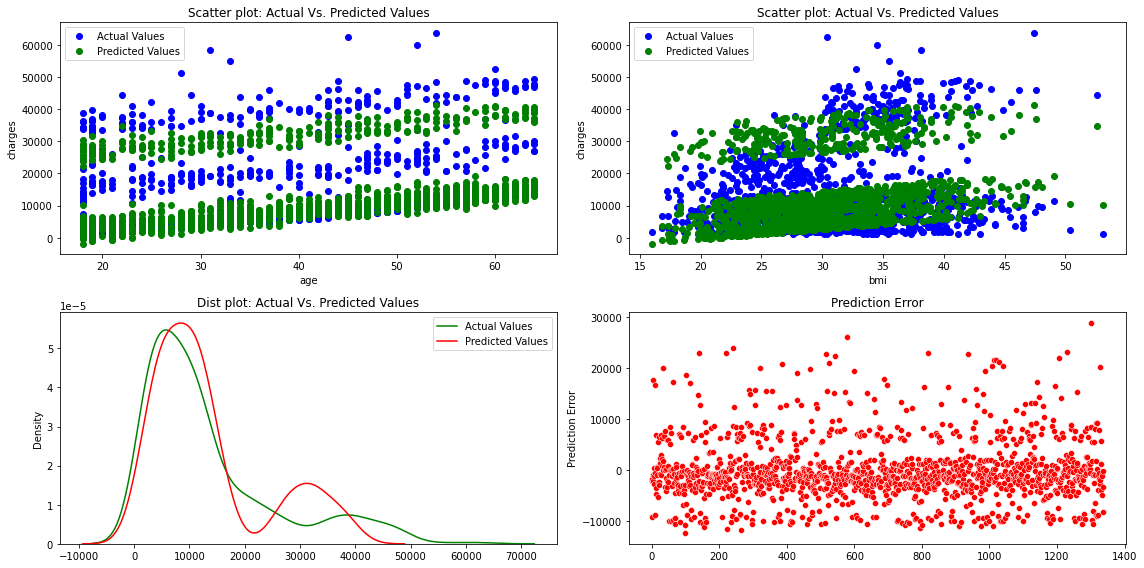

In [145]:
x=df_encoding1[['age','bmi','smoker_yes']]
y=df_encoding1[['charges']]

predictions = model3.predict(x)
df_encoding1['mlr_result'] = predictions

df_encoding1['mlr_error'] =  df_encoding1['charges'] - df_encoding1['mlr_result']


fig, axes =plt.subplots(2,2, figsize=(16,8))
axes[0][0].plot(x['age'], y,'bo',label='Actual Values')
axes[0][0].plot(x['age'], predictions,'go',label='Predicted Values')
axes[0][0].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0][0].set_xlabel("age")
axes[0][0].set_ylabel("charges")
axes[0][0].legend()


axes[0][1].plot(x['bmi'], y,'bo',label='Actual Values')
axes[0][1].plot(x['bmi'], predictions,'go',label='Predicted Values')
axes[0][1].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0][1].set_xlabel("bmi")
axes[0][1].set_ylabel("charges")
axes[0][1].legend()

sns.distplot(y, hist=False, color="g", label="Actual Values",ax=axes[1][0])
sns.distplot(predictions, hist=False, color="r", label="Predicted Values" , ax=axes[1][0])
axes[1][0].set_title("Dist plot: Actual Vs. Predicted Values")
axes[1][0].legend()

sns.scatterplot(x=y.index,y='mlr_error',data=df_encoding1,color="r", ax=axes[1][1])
axes[1][1].set_title("Prediction Error")
axes[1][1].set_ylabel("Prediction Error")

fig.tight_layout()

The figures show that the multiple linear regression model fits better than the simple linear regression because the predicted values are close to the observed data values

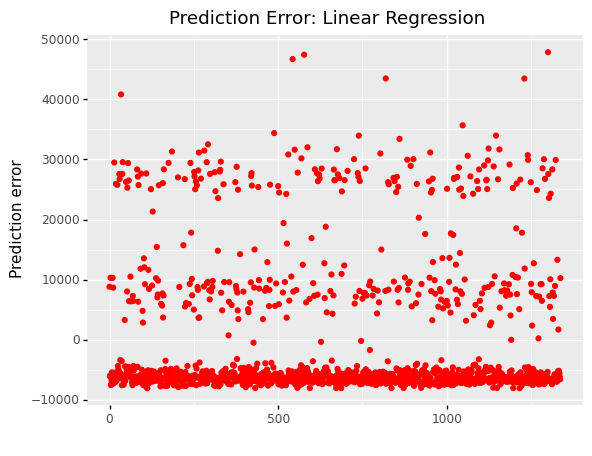

<ggplot: (311177589)>

In [146]:
(
    ggplot(df, aes(x='df.index'))
    +  geom_point(aes(y='slr_error'),color='red')
    + labs(x = ' ', y='Prediction error')
    + labs(title = 'Prediction Error: Linear Regression')
)

In [147]:
# print('length of x:',len(x))
#print('length of y:',len(y))


# print(df_encoding1)

In [148]:
df_encoding1

age     bmi  children     region      charges  smoker_yes  sex_male  \
0      19  27.900         0  southwest  16884.92400           1         0   
1      18  33.770         1  southeast   1725.55230           0         1   
2      28  33.000         3  southeast   4449.46200           0         1   
3      33  22.705         0  northwest  21984.47061           0         1   
4      32  28.880         0  northwest   3866.85520           0         1   
...   ...     ...       ...        ...          ...         ...       ...   
1333   50  30.970         3  northwest  10600.54830           0         1   
1334   18  31.920         0  northeast   2205.98080           0         0   
1335   18  36.850         0  southeast   1629.83350           0         0   
1336   21  25.800         0  southwest   2007.94500           0         0   
1337   61  29.070         0  northwest  29141.36030           1         0   

        mlr_result     mlr_error  
0     26079.218615  -9194.294615  
1      3889.737458  -2164.185158  
2      6236.798721  -1787.336721  
3      4213.213387  17771.257223  
4      5945.814340  -2078.959140  
...            ...           ...  
1333  11291.934816   -691.386516  
1334   3292.899462  -1086.918662  
1335   4883.392067  -3253.558567  
1336   2097.137324    -89.192324  
1337  37357.672966  -8216.312666  

[1338 rows x 9 columns]

## Scikit-learn regression models

Scikit-learn lets you perform linear regression in Python in a different way.

When it comes to machine learning in Python, Scikit-learn (or SKLearn) is the gold standard. There are many learning techniques available for regression, classification, clustering, and dimensionality reduction.

To use linear regression, we first need to import it:

In [149]:
from sklearn import linear_model

Let us use the same insurance cost dataset as before. Importing the datasets from SKLearn and loading the insurance dataset would initially be the same procedure:

In [150]:
df = pd.read_csv('/Users/Kaemyuijang/SCMA248/Data/insuranceKaggle.csv')

#### Create a model and fit it

In a simple linear regression, there is only one input variable and one output variable.

First Let us take age as the input variable and charges as the output.  We will define our x and y.

We then import the LinearRegression class from Scikit-Learn's `linear_model`. Then you can instantiate a new `LinearRegression` object. In this case it was called `lm`.

In [151]:
# Creating new variables

x=df[['age']]    #a two-dimensional array 
y=df['charges']  #a one-dimensional array

# Creating a new model 
lm = linear_model.LinearRegression()

In [152]:
print(x.shape)
print(y.shape)

(1338, 1)
(1338,)


The `.fit()` function fits a linear model. We want to make predictions with the model, so we use `.predict()`:

**Note** The method requires two arrays: X and y, according to the help documentation. The capital X denotes a two-dimensional array, whereas the capital Y denotes a one-dimensional array.

In [153]:
# fit the model
lm_model = lm.fit(x,y)

# Make predictions with the model
predictions = lm_model.predict(x)

df['slr_result'] = predictions

df['slr_error'] =  df['charges'] - df['slr_result']

Note that `.predict()` uses the linear model we fitted to predict the y (dependent variable). 

You have probably noticed that when we use SKLearn to perform a linear regression, we do not get a nice table like we do with **Statsmodels**. 

We may return the score, coefficients, and estimated intercepts by using built-in functions. Let us take a look at how it works:

The following code returns the R-squared (or the coefficient of determination) score. This is the proportion of explained variation of the predictions, as you may remember.

In [154]:
from sklearn.metrics import r2_score

r2_score(y.values , predictions)

0.08940589967885804

In [155]:
# alternative to r2_score

lm.score(x,y)

0.08940589967885804

In [156]:
print ('Slope: ', lm.coef_)
print ('Intercept: ',lm.intercept_)

Slope:  [257.72261867]
Intercept:  3165.885006063021


The results of the regression analysis, including the R-squared, slope, and intercept, are the same as for **statsmodel**.

#### The algorithm's evaluation

The final stage is to evaluate the algorithm's performance. 

This phase is especially significant when comparing the performance of multiple algorithms on a given data set. Regression methods are often evaluated using three metrics:

1. **Mean Absolute Error (MAE)** is the mean of the absolute value of the errors. It is calculated as:

$$ {\displaystyle \mathrm {MAE} ={\frac {\sum _{i=1}^{n}\left|y_{i}-\hat{y}_{i}\right|}{n}}}$$

where $\hat{y}_{i}$ is the prediction and $y_{i}$ the true value.

2. Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:

$${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}.}$$

3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$${\displaystyle \operatorname {RMSE} =\sqrt{{\frac {1}{n}}\sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}}.}$$

Fortunately, we do not have to do these calculations manually. The Scikit-Learn library has pre-built functions that we can use to determine these values for us.

Let us determine the values for these metrics using our test data. Run the following code:

In [157]:
from sklearn.metrics import * 

print('Mean Absolute Error:', mean_absolute_error(y.values , predictions))
print('Mean Squared Error:', mean_squared_error(y.values , predictions))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y.values , predictions)))

Mean Absolute Error: 9055.14962050455
Mean Squared Error: 133440978.61376347
Root Mean Squared Error: 11551.66562075632


In [158]:
#Alternatively, 

output_df = pd.DataFrame(columns=['MAE','MSE','R2-Score'],index=['Linear Regression','Multiple Linear Regression'])


output_df['MAE']['Linear Regression'] = np.mean(np.absolute(predictions - y.values))
output_df['MSE']['Linear Regression'] = np.mean((predictions - y.values) ** 2)
output_df['R2-Score']['Linear Regression'] = r2_score(y.values , predictions)


In [159]:
output_df

MAE               MSE  R2-Score
Linear Regression           9055.149621  133440978.613763  0.089406
Multiple Linear Regression          NaN               NaN       NaN

In all three approaches, the errors are calculated by taking the difference between predicted values and actual value, and **the lower the difference, the better**. 

The primary distinction is that MSE/RMSE **punish large errors** and are differentiable, whereas MAE is not, making it difficult to use in gradient descent. 

RMSE, in contrast to MSE, takes the square root, preserving the original data scale.

**Exercise** 

1. Perform a regression analysis using scikit-learn with the multiple regression model with age, bmi, and smoker as predictors. 

2. Evaluate the model using the three matrices MAE, MSE, RMSE and store the values in the DataFrame **output_df**.

## Multivariate Linear Regression in Scikit-Learn

We will perform linear regression using multiple variables.

Scikit-Learn makes creating these models a breeze. Remember passing a two-dimensional array `x` when you originally trained your model? 
In that array, there was only one column. 

To match your data with multiple variables, you can simply pass in an array with multiple columns. Let us take a look at how this works:

#### Categorical variable encoding

In [160]:
df = pd.read_csv('/Users/Kaemyuijang/SCMA248/Data/insuranceKaggle.csv')

# Categorical variable encoding
df_encoding1 = pd.get_dummies(data=df, columns=['smoker','sex'], drop_first=True)

In [161]:
# print(df.head())
# df_encoding1.head()

# rename the column names
df_encoding1 = df_encoding1.rename(columns={"smoker_1":"smoker_yes","sex_1":"sex_male"})

df_encoding1

age     bmi  children     region      charges  smoker_yes  sex_male
0      19  27.900         0  southwest  16884.92400           1         0
1      18  33.770         1  southeast   1725.55230           0         1
2      28  33.000         3  southeast   4449.46200           0         1
3      33  22.705         0  northwest  21984.47061           0         1
4      32  28.880         0  northwest   3866.85520           0         1
...   ...     ...       ...        ...          ...         ...       ...
1333   50  30.970         3  northwest  10600.54830           0         1
1334   18  31.920         0  northeast   2205.98080           0         0
1335   18  36.850         0  southeast   1629.83350           0         0
1336   21  25.800         0  southwest   2007.94500           0         0
1337   61  29.070         0  northwest  29141.36030           1         0

[1338 rows x 7 columns]

In [162]:
# Creating new variables
x=df_encoding1[['age','bmi','smoker_yes']]
y=df_encoding1['charges']


# Creating a new model and fitting it
multi = linear_model.LinearRegression()
multi_model = multi.fit(x, y)


predictions = multi_model.predict(x)
df_encoding1['mlr_result'] = predictions

mlr_error = y - predictions
df_encoding1['mlr_error'] = mlr_error

print ('Slope: ', multi_model.coef_)
print ('Intercept: ',multi_model.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - y.values)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - y.values) ** 2))
print("R2-score: %.2f" % r2_score(y.values , predictions) )

output_df['MAE']['Multiple Linear Regression'] = np.mean(np.absolute(predictions - y.values))
output_df['MSE']['Multiple Linear Regression'] = np.mean((predictions - y.values) ** 2)
output_df['R2-Score']['Multiple Linear Regression'] = r2_score(y.values , predictions)

Slope:  [  259.54749155   322.61513282 23823.68449531]
Intercept:  -11676.830425187785
Mean absolute error: 4216.78
Residual sum of squares (MSE): 37005395.75
R2-score: 0.75


Again, the results of the multiple regression analysis, including the R-squared, the coefficients, and the intercept, are the same as for **statsmodel**.

#### Visualize Predictions Of Multiple Linear Regression with Plotnine

/Users/Kaemyuijang/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
/Users/Kaemyuijang/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


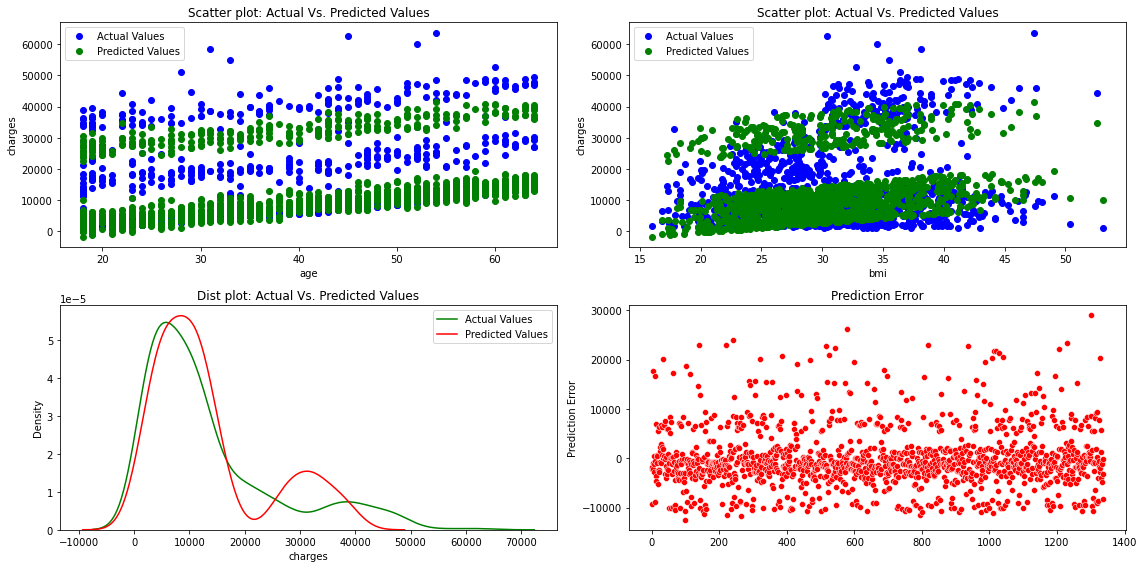

In [163]:

fig, axes =plt.subplots(2,2, figsize=(16,8))
axes[0][0].plot(x['age'], y,'bo',label='Actual Values')
axes[0][0].plot(x['age'], predictions,'go',label='Predicted Values')
axes[0][0].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0][0].set_xlabel("age")
axes[0][0].set_ylabel("charges")
axes[0][0].legend()

axes[0][1].plot(x['bmi'], y,'bo',label='Actual Values')
axes[0][1].plot(x['bmi'], predictions,'go',label='Predicted Values')
axes[0][1].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0][1].set_xlabel("bmi")
axes[0][1].set_ylabel("charges")
axes[0][1].legend()

sns.distplot(y, hist=False, color="g", label="Actual Values",ax=axes[1][0])
sns.distplot(predictions, hist=False, color="r", label="Predicted Values" , ax=axes[1][0])
axes[1][0].set_title("Dist plot: Actual Vs. Predicted Values")
axes[1][0].legend()

sns.scatterplot(x=y.index,y='mlr_error',data=df_encoding1,color="r", ax=axes[1][1])
axes[1][1].set_title("Prediction Error")
axes[1][1].set_ylabel("Prediction Error")

fig.tight_layout()

In [164]:
df_encoding1.head()

age     bmi  children     region      charges  smoker_yes  sex_male  \
0   19  27.900         0  southwest  16884.92400           1         0   
1   18  33.770         1  southeast   1725.55230           0         1   
2   28  33.000         3  southeast   4449.46200           0         1   
3   33  22.705         0  northwest  21984.47061           0         1   
4   32  28.880         0  northwest   3866.85520           0         1   

     mlr_result     mlr_error  
0  26079.218615  -9194.294615  
1   3889.737458  -2164.185158  
2   6236.798721  -1787.336721  
3   4213.213387  17771.257223  
4   5945.814340  -2078.959140

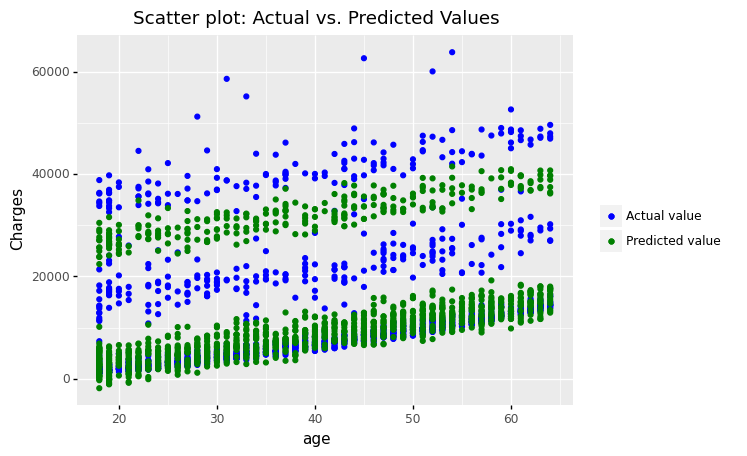

<ggplot: (306833141)>

In [165]:
(
    ggplot(df_encoding1) 
    + geom_point(aes(x = 'age', y='charges',color='"Actual value"'))     
    + geom_point(aes(x = 'age', y='mlr_result',color='"Predicted value"')) 
    #+ geom_smooth(aes(x = 'bmi', y = 'mlr_result', color='"Predicted value"'))
    + scale_color_manual(values = ['blue','green'], # Colors
        name = " ")
    + labs(y='Charges', title = 'Scatter plot: Actual vs. Predicted Values')
)

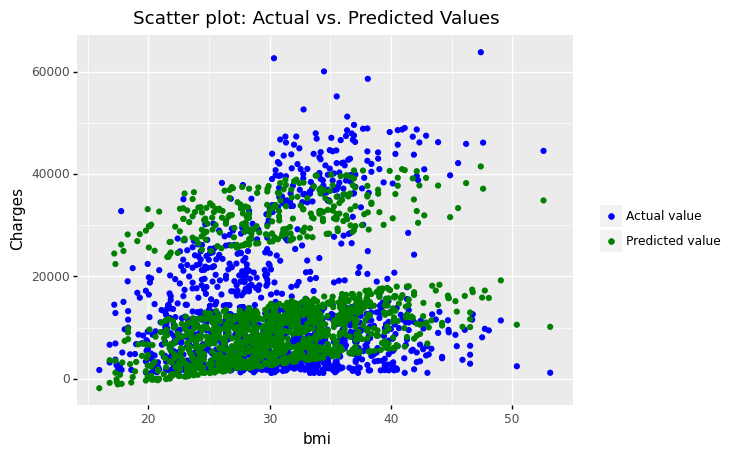

<ggplot: (305165713)>

In [166]:
(
    ggplot(df_encoding1) 
    + geom_point(aes(x = 'bmi', y='charges',color='"Actual value"'))     
    + geom_point(aes(x = 'bmi', y='mlr_result',color='"Predicted value"')) 
    #+ geom_smooth(aes(x = 'bmi', y = 'mlr_result', color='"Predicted value"'))
    + scale_color_manual(values = ['blue','green'], # Colors
        name = " ")
    + labs(y='Charges', title = 'Scatter plot: Actual vs. Predicted Values')
)

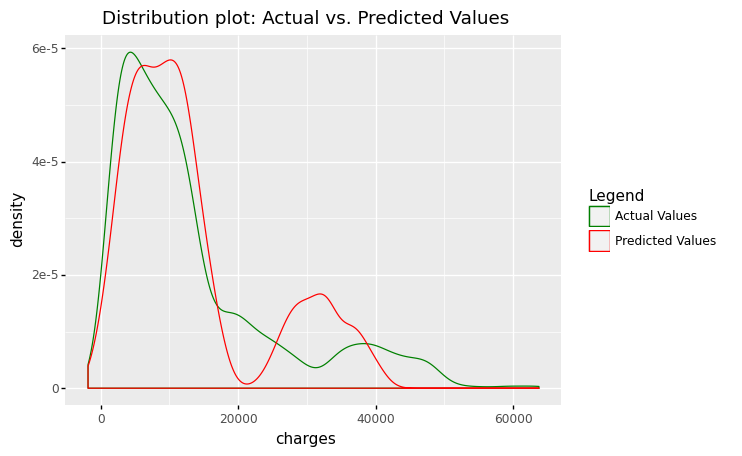

<ggplot: (311690677)>

In [167]:
(
    ggplot(df_encoding1, aes(x='charges'))
    +  geom_density(aes(y=after_stat('density'),color='"Actual Values"' ))
    +  geom_density(aes(x='mlr_result',y=after_stat('density'),color='"Predicted Values"')) 
    +  scale_color_manual(values = ['green','red'], name = 'Legend')
    +  labs(title = 'Distribution plot: Actual vs. Predicted Values')

 
)

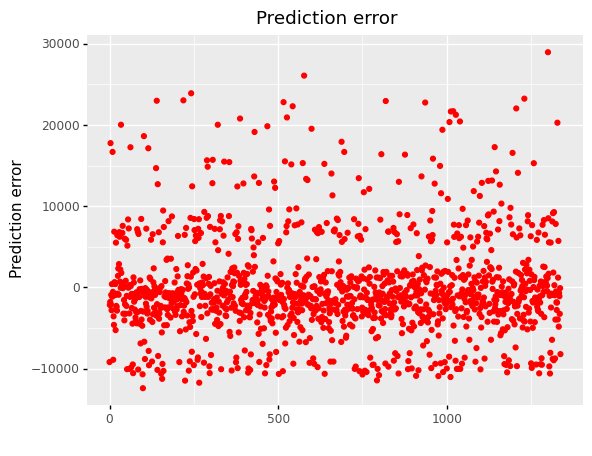

<ggplot: (304769825)>

In [168]:
(
    ggplot(df_encoding1, aes(x='df.index'))
    +  geom_point(aes(y='mlr_error'),color='red')
    + labs(x = ' ', y='Prediction error')
    + labs(title = 'Prediction error')
)

#### Compare Results and Conclusions

The error distribution can be used to assess the quality of a linear regression model (details given elsewhere). Quantitative measurements like MAE, MSE, RMSE, and R squared are also available for model comparison.

In [169]:
print(output_df)

                                    MAE               MSE  R2-Score
Linear Regression           9055.149621  133440978.613763  0.089406
Multiple Linear Regression  4216.775692   37005395.750508  0.747477


##### Conclusions

By comparing the simple linear regression and multiple linear regression models, we conclude that the multiple linear regression is the best model, achieving 74.75% accuracy (R-squared).

In this situation, an R-squared value of 0.7475 indicates that the multiple linear regression model explains 74.75 percent of the variation in the target variable, which is generally considered as a good rate.

When we look at error graphs, we can see that

* The error varies from -10,000 to 50,000 in simple linear regression.

* The error ranges from -10,000 to 30,000 in Multiple Linear Regression.

In [172]:
#(
#    ggplot(df, aes(x='df.index'))
#    +  geom_point(aes(y='slr_error'),color='red')
#    + labs(x = ' ', y='Prediction error')
#    + labs(title = 'Prediction Error: Linear Regression')
#)

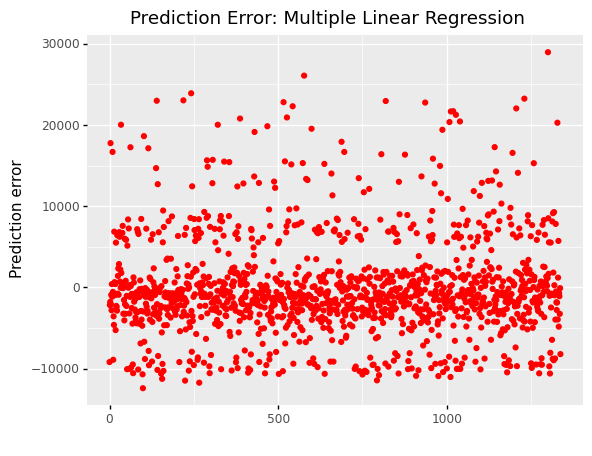

<ggplot: (309356937)>

In [173]:
(
    ggplot(df_encoding1, aes(x='df.index'))
    +  geom_point(aes(y='mlr_error'),color='red')
    + labs(x = ' ', y='Prediction error')
    + labs(title = 'Prediction Error: Multiple Linear Regression')
)